# Market Basket Analysis using Association Rule Mining

### Rameshta Vishwakarma

### Importing Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#from pyECLAT import ECLAT
from mlxtend.frequent_patterns import fpgrowth

### Dataset Description

In [2]:

read_df = pd.read_csv('transaction_data.csv')
df = read_df.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [3]:
df.ItemDescription.nunique()

4223

In [4]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [5]:
df.TransactionId.nunique()

25900

### Data Preprocessing

In [6]:
df.TransactionTime.str[-4:].unique()

array(['2019', '2018', '2028'], dtype=object)

In [7]:

df = df[df.UserId>0]# usedid <=0 : 25%

df = df[df.ItemCode>0]

df = df[df.NumberOfItemsPurchased>0]

df = df[df.CostPerItem>0]

df = df[df.ItemDescription.notna()]

df = df[df.TransactionTime.str[-4:] != '2028']


In [8]:
#df_2019 = df[df.TransactionTime.str[-4:] == '2019']
#print(df_2019.shape)
print(df.shape)

(790726, 8)


In [9]:
df = df[df.TransactionTime.str[-4:] == '2019']
df.shape

(201836, 8)

In [10]:

Ser = df.groupby('TransactionId').ItemDescription.nunique()
Ser.describe()


count    4162.000000
mean       23.309226
std        29.969042
min         1.000000
25%         7.000000
50%        15.000000
75%        29.000000
max       540.000000
Name: ItemDescription, dtype: float64

In [28]:

df_set = df.groupby(['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum().unstack().reset_index().fillna(0).set_index('TransactionId')


In [12]:

def encode(x):
    if x <= 0:
        return 0
    else:
        return 1
df_set = df_set.applymap(encode)
df_set

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
6291263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Data Visualization

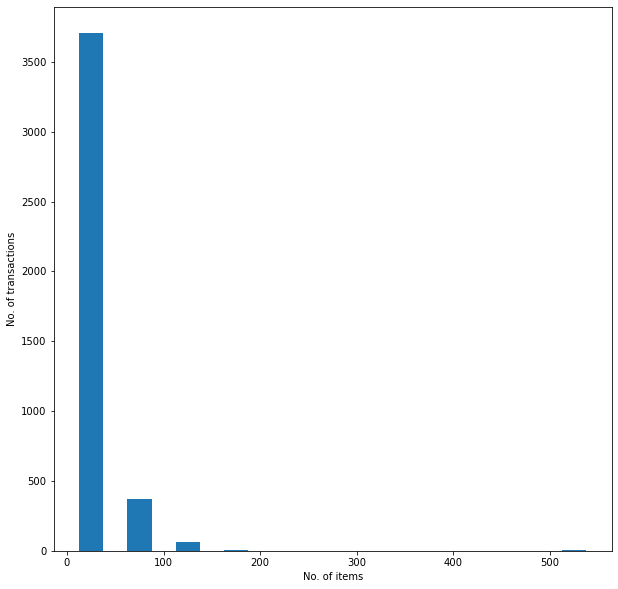

In [13]:

bins = [0,50,100,150,200,250,300,350,400,450,500,550]
fig = plt.figure(figsize = (10,10))
plt.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()


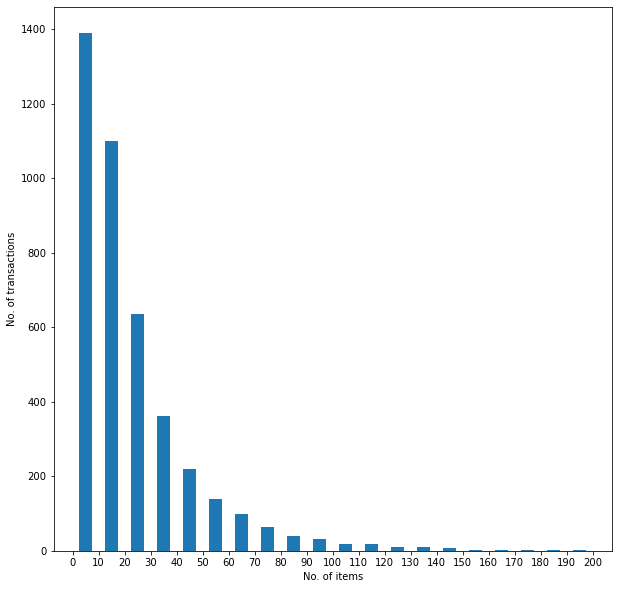

In [14]:

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
ax1.set_xticks(bins)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()


<BarContainer object of 10 artists>

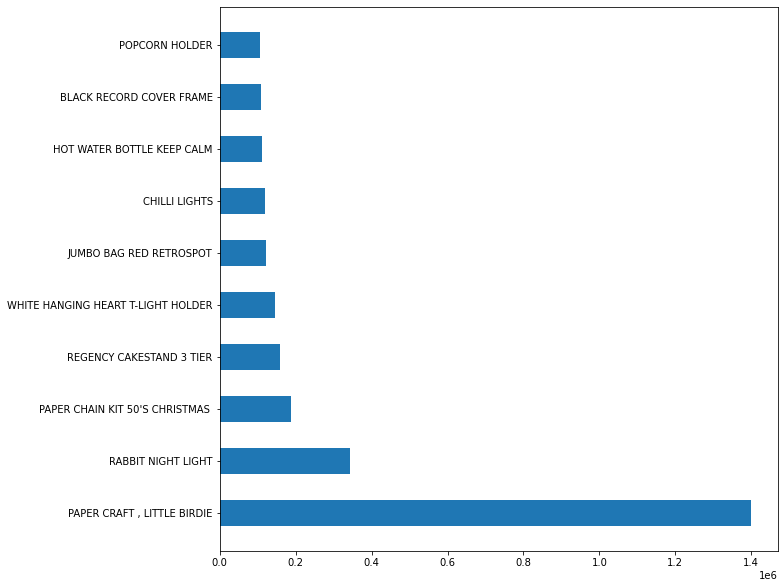

In [15]:

df['total_cost_item'] = df.NumberOfItemsPurchased*df.CostPerItem
Ser = df.groupby('ItemDescription').total_cost_item.sum()
Ser.sort_values(ascending = False, inplace = True)
Ser = Ser[:10]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(Ser.index, Ser, height = 0.5)


In [32]:
df_set = df.groupby(['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum().unstack().reset_index().fillna(0).set_index('TransactionId')

In [33]:
def encode(x):
 if x <= 0:
  return 0
 else:
  return 1
df_set = df_set.applymap(encode)
df_set


ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
6291263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## Apriori

In [34]:
frequent_itemsets = apriori(df_set, min_support = 0.020, use_colnames = True)

In [19]:
len(frequent_itemsets.index)

651

In [20]:
import time
support = [0.015,0.020,0.025,0.030,0.035]
time_apriori = []
no_frequent_itemsets_a = []
for value in support:
    start_time = time.time()
    frequent_itemsets = apriori(df_set, min_support = value, use_colnames = True)
    no_frequent_itemsets_a.append(len(frequent_itemsets.index))
    elapsed_time = time.time() - start_time
    time_apriori.append(elapsed_time)
    no_frequent_itemsets_a.append(len(frequent_itemsets.index))
    
df_time = pd.DataFrame(list(zip( support, time_apriori , no_frequent_itemsets_a )),
                  columns = [ 'support' , 'time_apriori' , 'no_frequent_itemsets_a' ])
print(df_time)

   support  time_apriori  no_frequent_itemsets_a
0    0.015     74.801682                     651
1    0.020      5.878201                     651
2    0.025      2.638936                     364
3    0.030      1.410914                     364
4    0.035      0.928493                     233


### Analysis

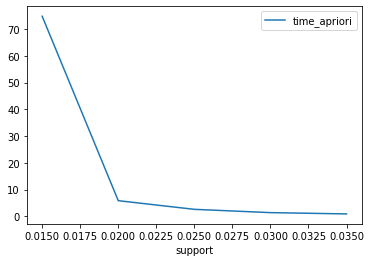

In [21]:
import matplotlib.pyplot as plt
ax = plt.gca()
  
#use plot() method on the dataframe
df_time.plot( x = 'support' , y = 'time_apriori', ax = ax )
#df_time.plot( x = 'support' , y = 'no_frequent_itemsets_a' , ax = ax )

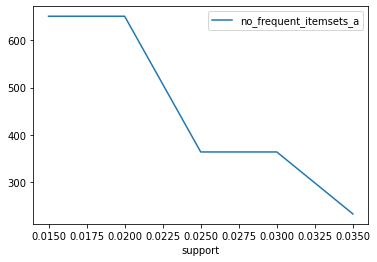

In [22]:
ax = plt.gca()
df_time.plot( x = 'support' , y = 'no_frequent_itemsets_a' , ax = ax )

C:\Users\Rames\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Support')

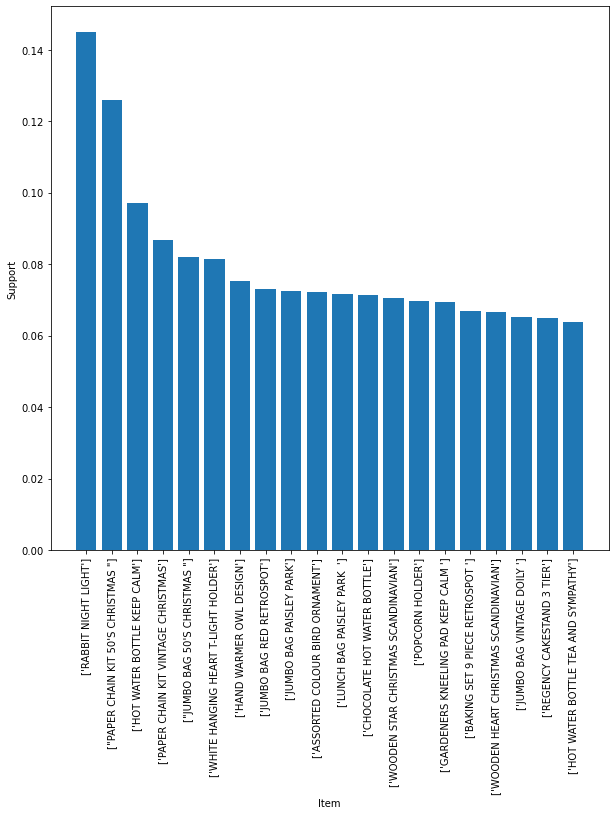

In [23]:
#frequent_itemsets = apriori(df_set, min_support = 0.015, use_colnames = True)
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

In [24]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.2)

In [25]:
top_rules = rules.sort_values('confidence', ascending = False)[:10]

In [26]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.066555,0.070399,0.051658,0.776173,11.025369,0.046972,4.153218
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.052619,0.053580,0.038924,0.739726,13.806008,0.036104,3.636245
12,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.070399,0.066555,0.051658,0.733788,11.025369,0.046972,3.506404
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.053580,0.052619,0.038924,0.726457,13.806008,0.036104,3.463377
7,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.056944,0.069438,0.040846,0.717300,10.330107,0.036892,3.291690
11,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.086737,0.125901,0.058385,0.673130,5.346504,0.047465,2.674150
9,(HAND WARMER BIRD DESIGN),(HAND WARMER OWL DESIGN),0.058866,0.075204,0.036761,0.624490,8.303919,0.032334,2.462771
6,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.069438,0.056944,0.040846,0.588235,10.330107,0.036892,2.290279
5,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.063912,0.071360,0.036521,0.571429,8.007696,0.031960,2.166827
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.071360,0.097069,0.036761,0.515152,5.307081,0.029834,1.862296


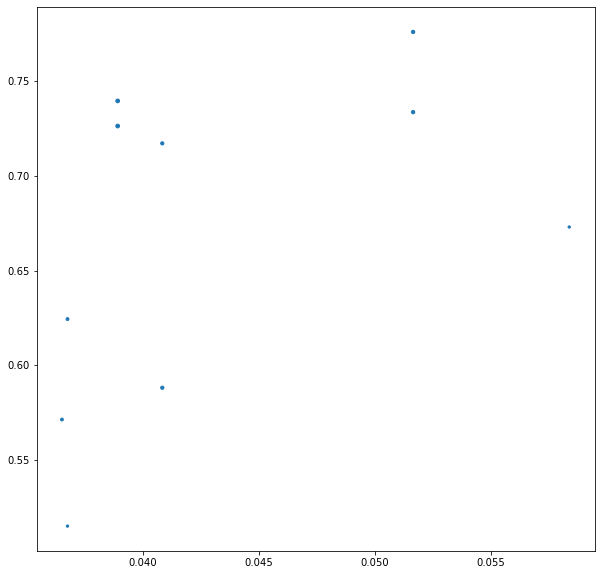

In [27]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(top_rules.support, top_rules.confidence, top_rules.lift)


{'r': Text(0.6789637398518062, -0.630545727264985, 'r'),
 '0': Text(-0.3643878151938341, 0.9711092944049082, '0'),
 'WOODEN HEART CHRISTMAS SCANDINAVIAN': Text(0.7035368674283756, 0.8121494833327589, 'WOODEN HEART CHRISTMAS SCANDINAVIAN'),
 'r0': Text(-0.9628315268293669, 0.3499832460409664, 'r0'),
 'WOODEN STAR CHRISTMAS SCANDINAVIAN': Text(0.8104898190730533, 0.649771837346786, 'WOODEN STAR CHRISTMAS SCANDINAVIAN'),
 '1': Text(-0.9080879917628503, -0.19620511260800078, '1'),
 'ALARM CLOCK BAKELIKE GREEN': Text(-0.8864524340584085, -0.4260010242622005, 'ALARM CLOCK BAKELIKE GREEN'),
 'r1': Text(-0.8805886319495702, 0.0005566960059434772, 'r1'),
 'ALARM CLOCK BAKELIKE RED ': Text(-0.818559853354146, 0.4845822321966635, 'ALARM CLOCK BAKELIKE RED '),
 '2': Text(0.8321853022343639, -0.18319062105385014, '2'),
 'r2': Text(-0.21666845633703774, -0.8743522815891571, 'r2'),
 '3': Text(0.9675206239370092, -0.08848324493448129, '3'),
 'r3': Text(-0.3315783390741277, -0.6713331248191405, 'r3'),


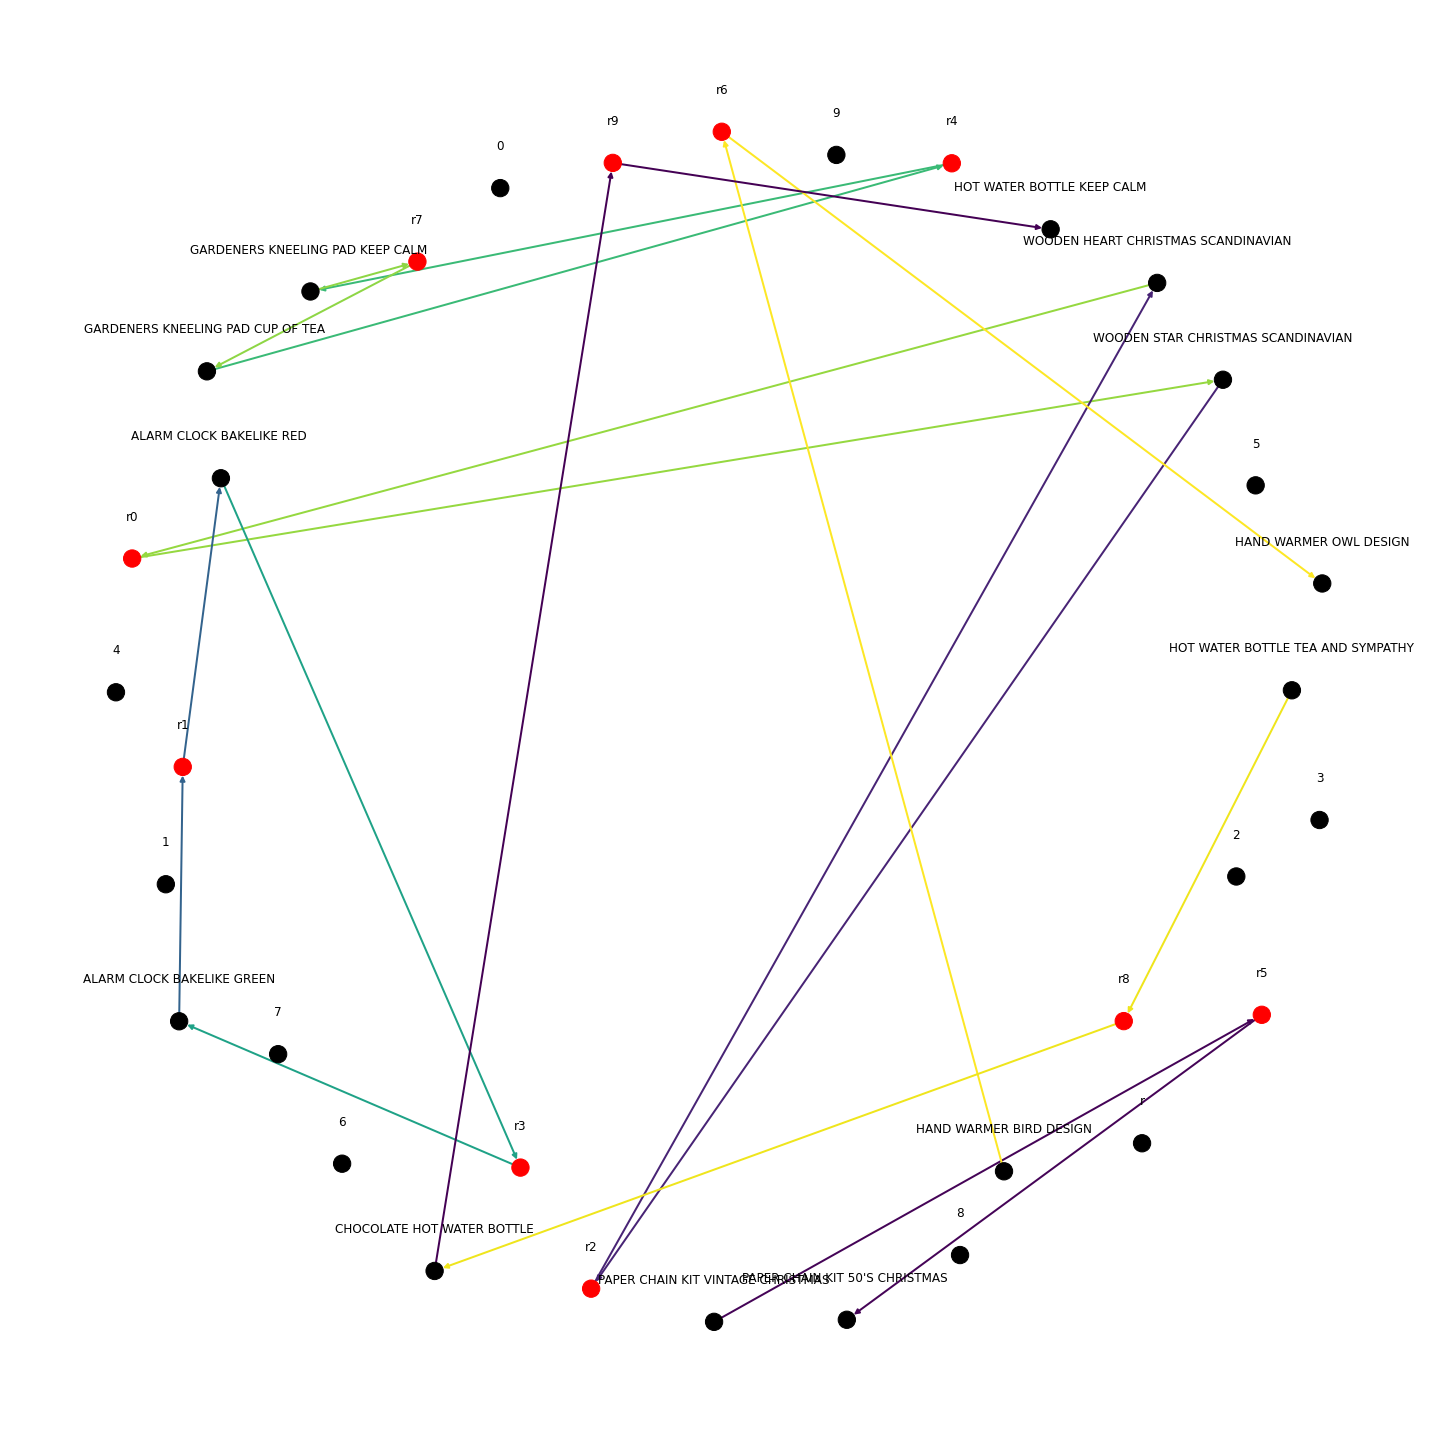

In [28]:
import networkx as nx
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, edges = edges, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)

In [29]:
rules[(rules.lift >= 9.388) & (rules.confidence >= 0.429)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.053580,0.052619,0.038924,0.726457,13.806008,0.036104,3.463377
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.052619,0.053580,0.038924,0.739726,13.806008,0.036104,3.636245
6,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.069438,0.056944,0.040846,0.588235,10.330107,0.036892,2.290279
7,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.056944,0.069438,0.040846,0.717300,10.330107,0.036892,3.291690
12,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.070399,0.066555,0.051658,0.733788,11.025369,0.046972,3.506404
13,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.066555,0.070399,0.051658,0.776173,11.025369,0.046972,4.153218
